## 1. Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


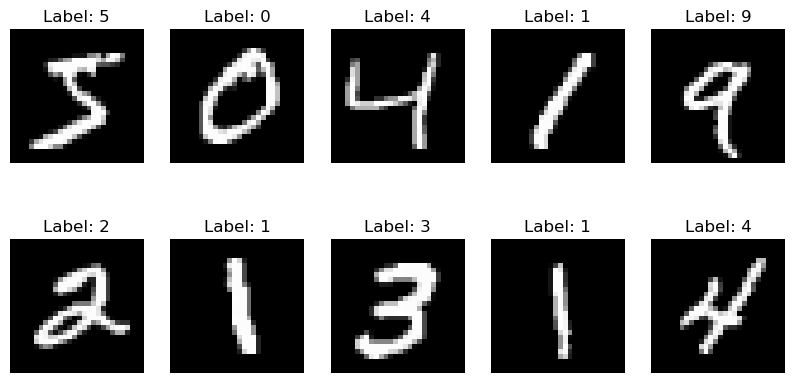

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Loading the MNIST dataset and unpacking into training and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# The mnist.load_data() function returns two tuples: (X_train, y_train) and (X_test, y_test)
# X contains images and y contains the corresponding labels
print(X_train.shape)
# Loads the data into memory as NumPy arrays
# Verifies the data's shape ensures that the dataset has been loaded correctly and matches expected dimensions for further preprocessing

# Normalizing the pixel values to a range of 0 to 1 
# Pixel values in the original dataset range from 0 to 255 (8-bit grayscale)
X_train = X_train.astype("float32") / 255.0
# Dividing by 255 scales these values to the range of 0 to 1, which is better suited for numerical stability in neural networks
# The astype("float32") converts the integer pixel values to 32-bit floating-point numbers
X_test = X_test.astype("float32") / 255.0
# Normalization accelerates training by ensuring that inputs have a similar scale

# Reshapes the data from 28x28 images into 1D vectors of length 784 (28*28)
# Reshaping simplifies the data format for compatibility with fully connected layers in the model
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Ploting the first 10 training images with their labels
# Making sure everything works
plt.figure(figsize=(10, 5)) # Creates a figure with a specified size for plotting
for i in range(10):
    plt.subplot(2, 5, i+1) # Creates a grid of 2 rows and 5 columns, placing the current image in the appropriate subplot
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # Converts the flat vector back into a 28x28 matrix for visualization and displays it in grayscale
    plt.title(f"Label: {y_train[i]}") # Adds a title to each subplot showing the label of the corresponding digit
    plt.axis('off') # Hides the axes for a cleaner visualization
plt.show()


## Build the Neural Network Model

Epoch 1/10
1500/1500 - 1s - 524us/step - accuracy: 0.8581 - loss: 0.4752 - val_accuracy: 0.8911 - val_loss: 0.3679
Epoch 2/10
1500/1500 - 0s - 288us/step - accuracy: 0.8915 - loss: 0.3734 - val_accuracy: 0.9052 - val_loss: 0.3331
Epoch 3/10
1500/1500 - 0s - 298us/step - accuracy: 0.8962 - loss: 0.3568 - val_accuracy: 0.8895 - val_loss: 0.3809
Epoch 4/10
1500/1500 - 0s - 287us/step - accuracy: 0.8979 - loss: 0.3533 - val_accuracy: 0.9038 - val_loss: 0.3350
Epoch 5/10
1500/1500 - 0s - 298us/step - accuracy: 0.9012 - loss: 0.3475 - val_accuracy: 0.9069 - val_loss: 0.3275
Epoch 6/10
1500/1500 - 0s - 316us/step - accuracy: 0.9001 - loss: 0.3437 - val_accuracy: 0.8898 - val_loss: 0.3816
Epoch 7/10
1500/1500 - 0s - 316us/step - accuracy: 0.9020 - loss: 0.3394 - val_accuracy: 0.8953 - val_loss: 0.3646
Epoch 8/10
1500/1500 - 0s - 303us/step - accuracy: 0.9041 - loss: 0.3361 - val_accuracy: 0.8990 - val_loss: 0.3574
Epoch 9/10
1500/1500 - 0s - 327us/step - accuracy: 0.9030 - loss: 0.3336 - val_a

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,112 (74.66 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,742 (49.78 KB)

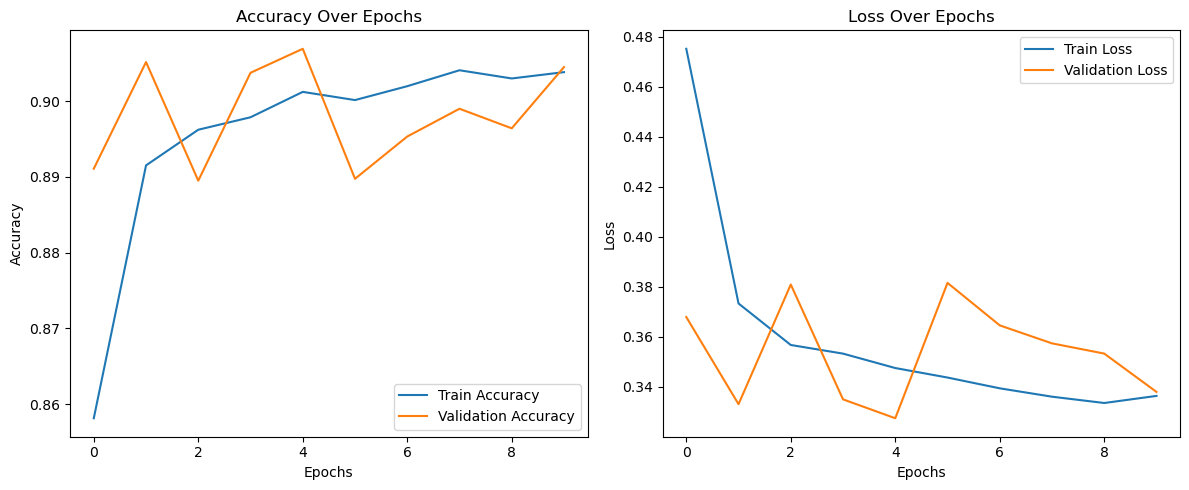

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       980
           1       0.92      0.99      0.95      1135
           2       0.93      0.84      0.88      1032
           3       0.83      0.89      0.86      1010
           4       0.93      0.90      0.92       982
           5       0.84      0.84      0.84       892
           6       0.94      0.92      0.93       958
           7       0.92      0.91      0.91      1028
           8       0.88      0.86      0.87       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



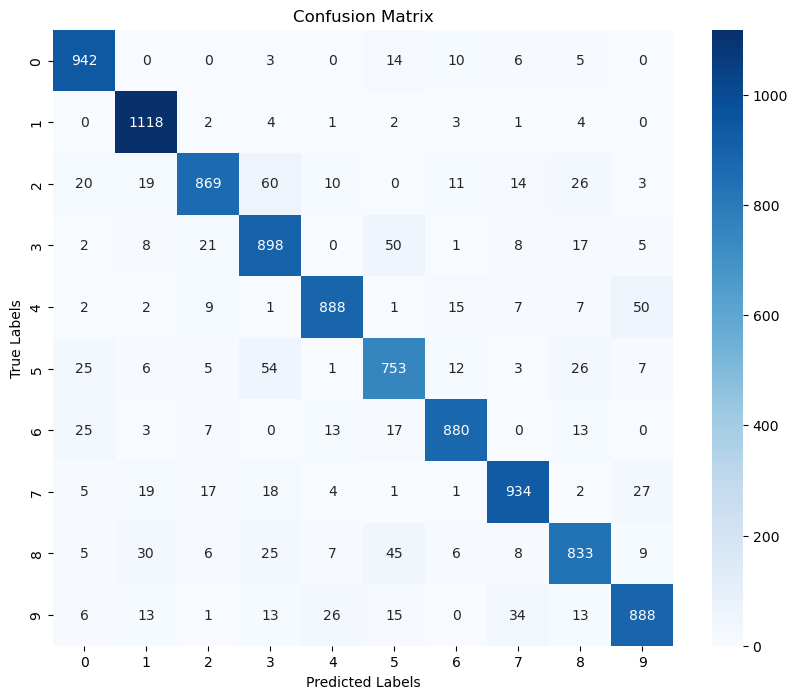

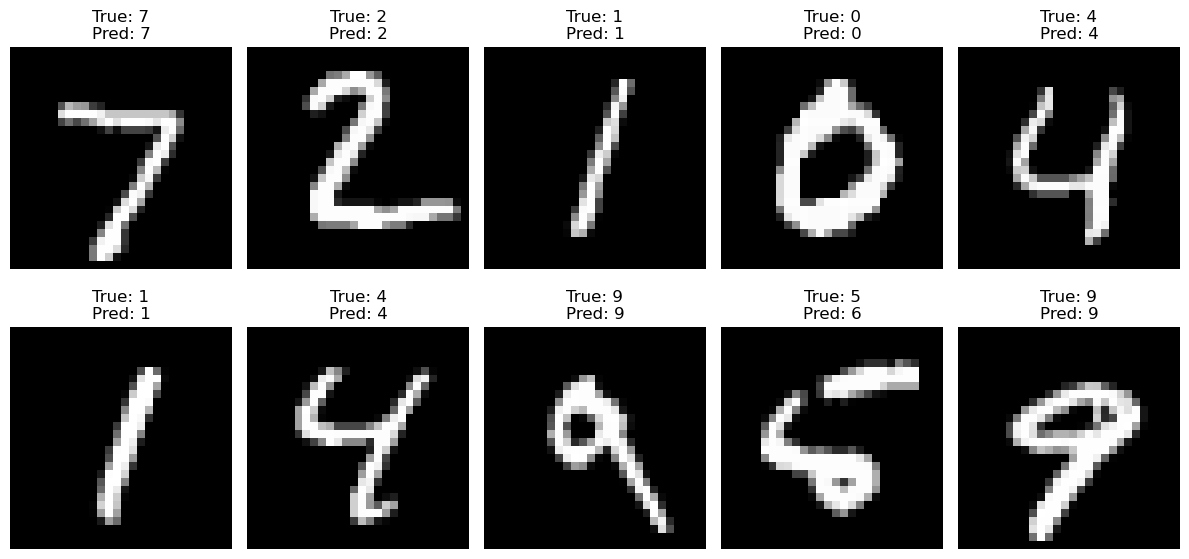

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Build the neural network model
model = Sequential ([Input(shape=(784,)), Dense(8, activation='relu'), Dense(10, activation='softmax')])

# Compiling the model
model.compile (optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
part_2_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


model.summary()

# Plots training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(part_2_history.history['accuracy'], label='Train Accuracy')
plt.plot(part_2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(part_2_history.history['loss'], label='Train Loss')
plt.plot(part_2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("part_2_accuracy_loss.pdf")
plt.show()

# Generates predictions
part_2_y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
part_2_report = classification_report(y_test, part_2_y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(part_2_report)

# Saves the classification report
with open("classification_report.txt", "w") as f:
    f.write(part_2_report)

# Confusion matrix
part_2_conf_matrix = confusion_matrix(y_test, part_2_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(part_2_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("part_2_confusion_matrix.pdf") # Converts txt file to pdf
plt.show

# Visualizes predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {part_2_y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("part_2_predictions.pdf")
plt.show()

## Train the Neural Network

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step - accuracy: 0.8732 - loss: 0.4404 - val_accuracy: 0.9548 - val_loss: 0.1482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9634 - loss: 0.1262 - val_accuracy: 0.9701 - val_loss: 0.0969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9759 - loss: 0.0778 - val_accuracy: 0.9765 - val_loss: 0.0804
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9826 - loss: 0.0555 - val_accuracy: 0.9764 - val_loss: 0.0774
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9873 - loss: 0.0437 - val_accuracy: 0.9771 - val_loss: 0.0707
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9767 - val_loss: 0.0783
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9784 - val_loss: 0.0731
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9935 -

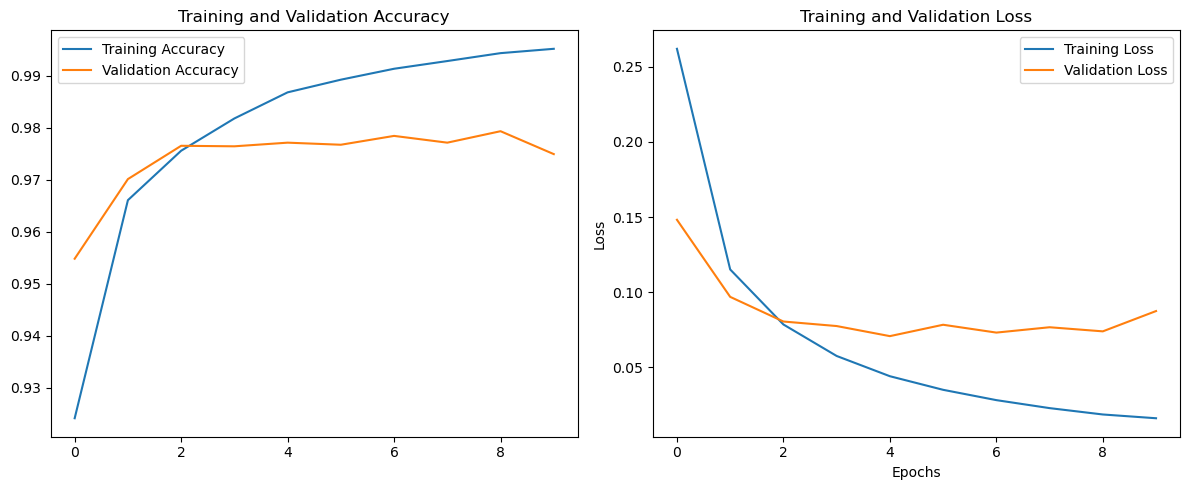

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       1.00      0.94      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



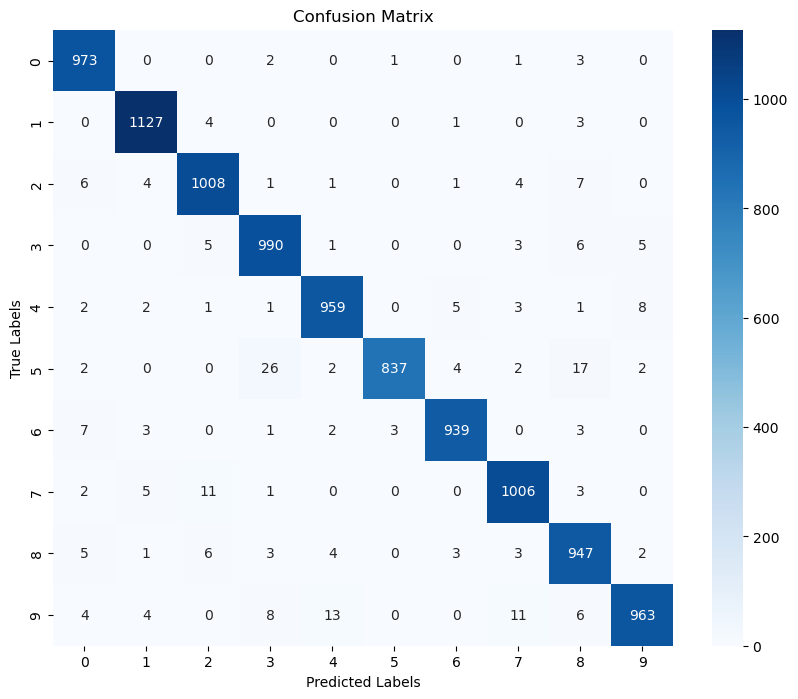

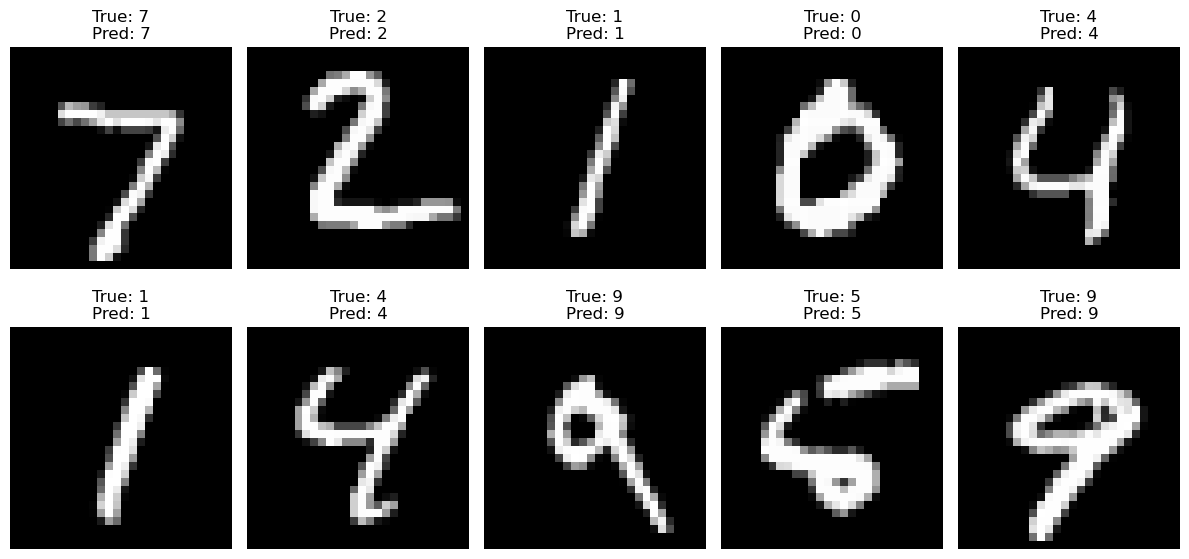

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Defines the modified neural network model
model = Sequential([Input(shape=(784,)), Dense(128, activation='relu'), Dense(10, activation='softmax')])

# This compiles the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Defines a checkpoint to save the best-performing model during training
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')


# Trains the model and track its performance
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[checkpoint])


print("here")
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display
plt.tight_layout()
plt.savefig("part_3_accuracy_loss_graphs.pdf")
plt.show()

# Generates predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
part_3_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(part_3_report)

# This saves classification report
with open("modified_classification_report.txt", "w") as f:
    f.write(part_3_report)

# Confusion matrix
part_3_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(part_3_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("part_3_confusion_matrix.pdf")
plt.show()

# This visualizes sample predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("part_3_predictions.pdf")
plt.show()


## Evaluate the Model

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 - 2s - 2ms/step - accuracy: 0.9004 - loss: 0.3300 - val_accuracy: 0.9607 - val_loss: 0.1242
Epoch 2/20
938/938 - 2s - 2ms/step - accuracy: 0.9545 - loss: 0.1503 - val_accuracy: 0.9706 - val_loss: 0.0939
Epoch 3/20
938/938 - 2s - 2ms/step - accuracy: 0.9649 - loss: 0.1143 - val_accuracy: 0.9750 - val_loss: 0.0783
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.9697 - loss: 0.0998 - val_accuracy: 0.9788 - val_loss: 0.0723
Epoch 5/20
938/938 - 1s - 2ms/step - accuracy: 0.9750 - loss: 0.0813 - val_accuracy: 0.9785 - val_loss: 0.0724
Epoch 6/20
938/938 - 1s - 2ms/step - accuracy: 0.9772 - loss: 0.0745 - val_accuracy: 0.9806 - val_loss: 0.0654
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.9782 - loss: 0.0683 - val_accuracy: 0.9800 - val_loss: 0.0641
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.9802 - loss: 0.0617 - val_accuracy: 0.9813 - val_loss: 0.0645
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.9820 - loss: 0.0568 - val_accuracy: 0.9819 - val_loss: 0.0648
E

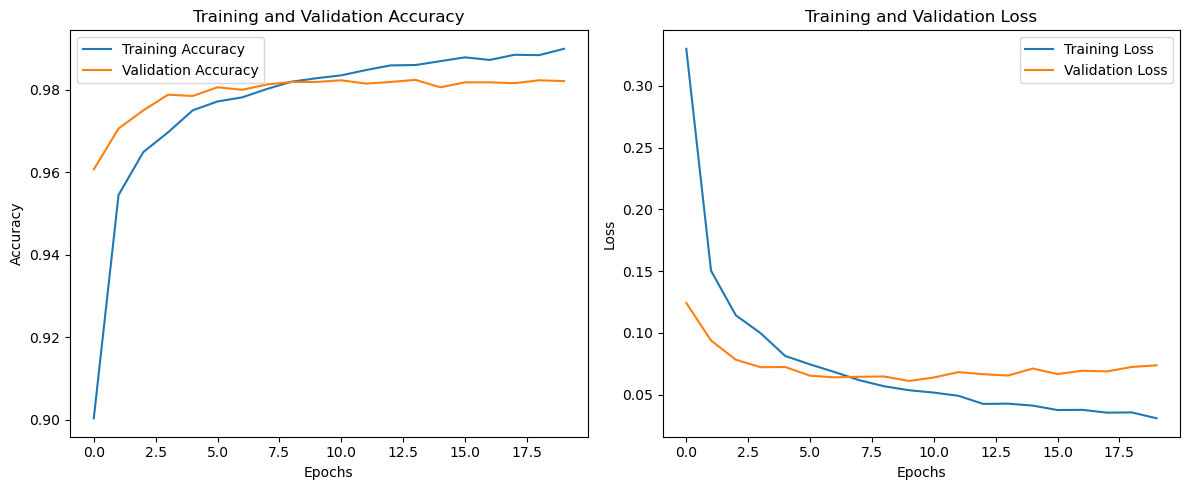

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9785 - loss: 0.0808
Test Accuracy: 0.9824
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



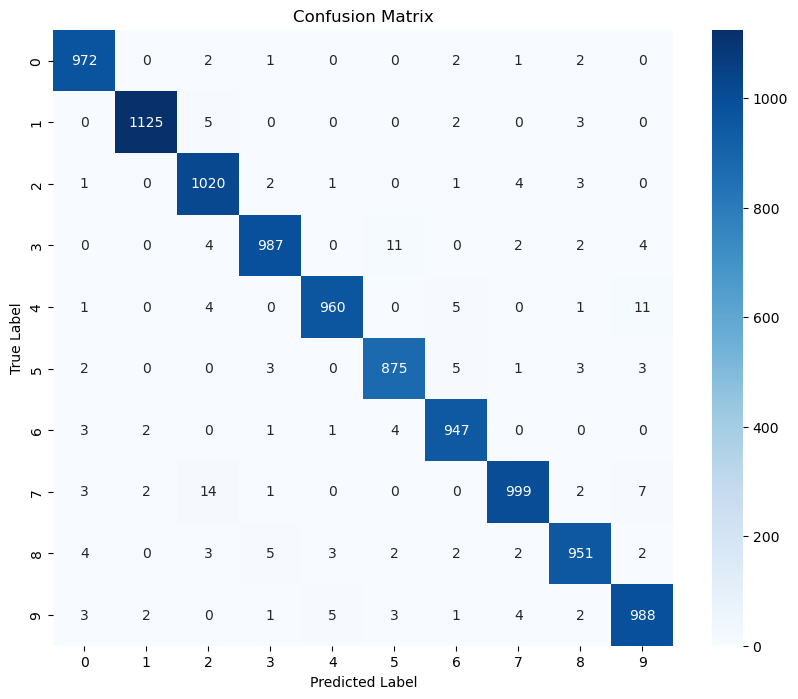

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Defines the neural network architecture
model = Sequential([Dense(256, activation='relu', input_shape=(784,)), Dropout(0.3), Dense(128, activation='relu'), Dropout(0.3), Dense(10, activation='softmax')])

# Compiles the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Defines checkpoint
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# This trains the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[checkpoint],verbose=2)

best_model = tf.keras.models.load_model('best_model.keras')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # First subplot (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)  # Second subplot (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("part_4_accuracy_loss.pdf")

# Show the graphs
plt.tight_layout()
plt.show()

# This evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predicts on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generates the classification report
part_4_report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(part_4_report)

# Saves the classification report
with open("classification_report_high_f1.txt", "w") as f:
    f.write(part_4_report)

# Compute the confusion matrix 
part_4_cm = confusion_matrix(y_test, y_pred_classes)

# Plots the confusion matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(part_4_cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("part_4_confusion_matrix.pdf")
plt.show()


## Visualize Predictions

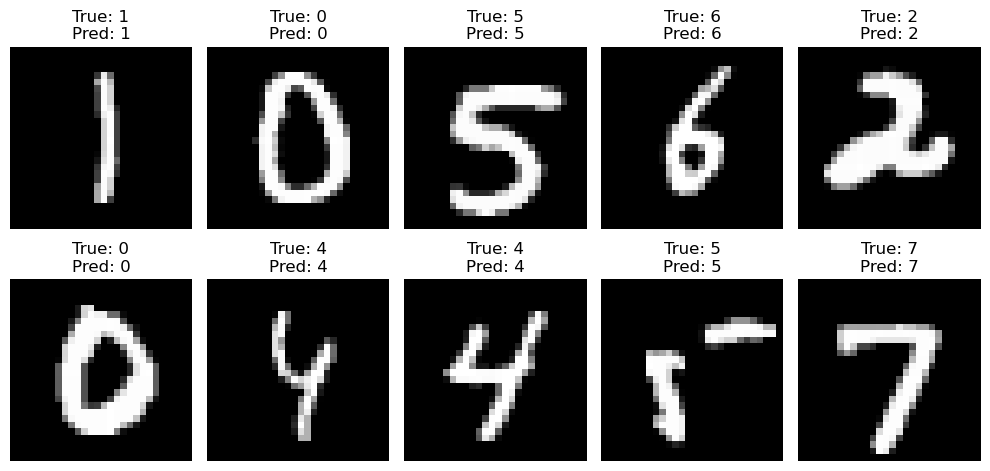

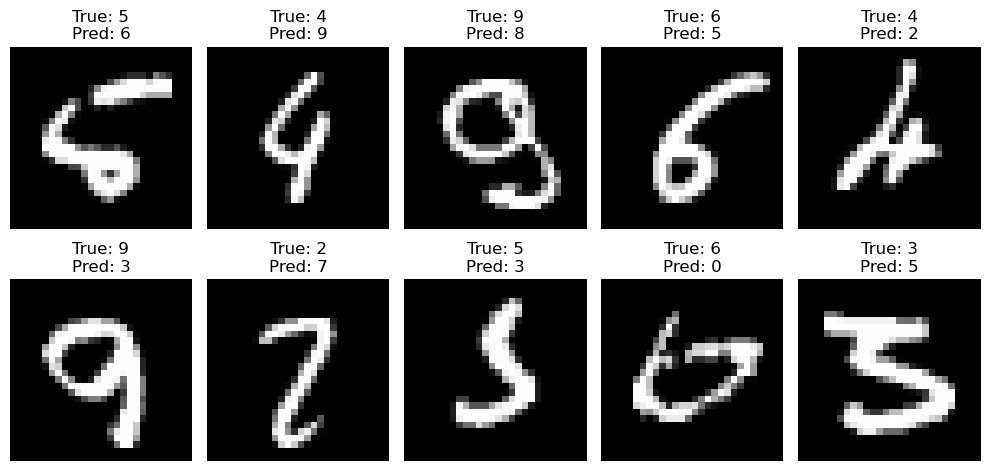

In [11]:
# Randomly selects 10 indices from the test set using np.random.choice
# This ensures diversity in the predictions displayed, showcasing the model's performance on random test samples
indices = np.random.choice(len(X_test), 10, replace=False)

# Plots 10 randomly selects test samples along with their true and predicted labels
# The subplot grid is used to display the images in a compact and clear layout for visual inspection
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray') # Reshapes flat vectors into 28x28 images
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}") # Displays both true and predicted labels
    plt.axis('off') # Removes axes for a cleaner look
plt.tight_layout() # Adjust subplot spacing
plt.show()

# Identifies indices of test samples where the true label does not match the predicted label
# This highlights the model's misclassifications for further analysis
incorrect_indices = np.where(y_test != y_pred_classes)[0]

# Plots the first 10 misclassified test samples, showing the true vs predicted labels
# This helps visually identify patterns in the model's mistakes which can inform future improvements 
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]): # Limits to the first 10 incorrect predictions
    plt.subplot(2, 5, i + 1) 
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray') # Reshapes flat vectors into 28x28 images
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}") # Displays true and predicted labels
    plt.axis('off') # Removes axes for clarity
plt.tight_layout() # Adjusts the subplot spacing
plt.show()

In [12]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt
import numpy as np
import os
from PyPDF2 import PdfReader, PdfWriter

def save_classification_report_as_pdf(report, output_pdf):
    # Creates a figure and axes object
    fig, ax = plt.subplots(figsize=(8, 6))

    # Converts the classification report to a pandas dataframe for easy plotting
    report_data = classification_report(y_test, y_pred_classes, output_dict=True)
    df = pd.DataFrame(report_data).transpose()

    # Removes the 'accuracy' row as it may contain unwanted information
    df = df.drop('accuracy')

    # Uses seaborn to display the dataframe as a table
    sns.set(style="whitegrid")
    sns.heatmap(df.iloc[:-1, :].T, annot=True, fmt=".2f", cmap="Blues", cbar=False, linewidths=1.5)

    # Saves as the PDF
    pdf_path = output_pdf
    plt.savefig(pdf_path, format="pdf")
    plt.close()

def merge_pdfs(pdf_list, output_pdf):
    # Creates a PdfWriter object to write to the output PDF
    pdf_writer = PdfWriter()

    # Loops through each PDF file in the list
    for pdf_file in pdf_list:
        # Read the current PDF
        pdf_reader = PdfReader(pdf_file)
        
        # Adds each page from the current PDF to the output PDF
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            pdf_writer.add_page(page)
    
    # Writes the combined PDF to the output file
    with open(output_pdf, 'wb') as output_file:
        pdf_writer.write(output_file)
    
    print(f"PDFs merged successfully into {output_pdf}")

def create_pdf_from_dict(file_name, data_dict, title):
    c = canvas.Canvas(file_name, pagesize=letter)
    width, height = letter
    
    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 50, title)
    
    # Subtitle
    c.setFont("Helvetica", 10)
    c.drawString(100, height - 70, "Generated Report")
    
    # Writes the dictionary content
    text_object = c.beginText(100, height - 100)
    text_object.setFont("Helvetica", 7)
    
    for key, value in data_dict.items():
        text_object.textLine(f"{key}: {value}")
    
    c.drawText(text_object)
    c.save()

# Creates pdf from classification report
save_classification_report_as_pdf(part_2_report, "part_2_classification_report.pdf")
# Lists all pdfs created from part 2 and merges them into one pdf
part_2_pdfs = ["part_2_accuracy_loss.pdf", "part_2_classification_report.pdf", "part_2_confusion_matrix.pdf", "part_2_predictions.pdf"]
merge_pdfs(part_2_pdfs, "part_2_results.pdf")

# Creates pdf from classification report
save_classification_report_as_pdf(part_3_report, "part_3_classification_report.pdf")
# Lists all pdfs created from part 3 and merges them into one pdf
part_3_pdfs = ["part_3_accuracy_loss_graphs.pdf", "part_3_classification_report.pdf", "part_3_confusion_matrix.pdf", "part_3_predictions.pdf"]
merge_pdfs(part_3_pdfs, "part_3_results.pdf")

# Answers to discussion questions
discussion_points = {
        "1. Epochs": "An epoch refers to one complete pass through the dataset. Increasing epochs allows the model to refine parameters but may overfit if excessive.",
        "2. Batch Size": "Batch size is the number of samples processed before updating the model. Smaller batches generalize better; larger ones train faster but may overfit.",
        "3. Dropout": "Dropout randomly disables neurons during training to prevent overfitting. This ensures the model learns robust and distributed representations."
}

# Creates pdf from classification report
save_classification_report_as_pdf(part_4_report, "part_4_classification_report.pdf")

# Creates pdf from answer dictionary
create_pdf_from_dict("final_responses.pdf", discussion_points, "Discussion Questions")

# Lists all pdfs created from parts 4 and 5 and merges them into one pdf
part_4_pdfs = ["part_4_accuracy_loss.pdf", "part_4_classification_report.pdf", "part_4_confusion_matrix.pdf", "final_responses.pdf"]
merge_pdfs(part_4_pdfs, "parts_4_5_results.pdf")

# Lists all pdfs created from result pdfs and merges them into one pdf with all the answers
final_pdfs = ["part_2_results.pdf", "part_3_results.pdf", "parts_4_5_results.pdf"]
merge_pdfs(final_pdfs, "Assignment_5_final_results.pdf")



PDFs merged successfully into part_2_results.pdf
PDFs merged successfully into part_3_results.pdf
PDFs merged successfully into parts_4_5_results.pdf
PDFs merged successfully into Assignment_5_final_results.pdf
